In [1]:
#Workbook on calculations of cosmological parameters and tidal radii for merging clusters
#The final approximation we used is towards the end, assuming additive nature of tidal force
#For justification and results see Mansheim et al. 2017
#Calculation of cosmological quantities requires many steps and unit conversions so excuse the mess
import pandas as pd
import numpy as np
import matplotlib.pyplot as py
from sympy import *
import cluster_tools.profiles as profiles
import sys
%pylab inline
import cluster_tools.CAT as CAT
import cluster_tools.tools as tools
import cluster_tools.cosmo as cosmos
import cluster_tools.Cluster_functs as t
import cluster_tools.CalcVelDisp_bcl_edit as v
import scipy.integrate
import mpld3
#mpld3.enable_notebook()

3!= 6.0 = e^(ln[gamma(4)]) = 6
120.0
4.03291461127e+26
24.0
0.994376487882
0.00562351211827
1.0
0.112754082424
0.520357177501
0.842681743299
0.999999999998
-0.112754082424
-0.520357177501
-0.842681743299
-0.999999999998
36.4981663726
0.999329074744
Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#A bunch of cosmological constants for calculations
#Some were calculated specifically for our system using functions in cluster_tools
G = 4.3*10**(-9) #newton's constant in units of Mpc*(km/s)**2 / M_sun
minMpc = 3.08568025*10**22 # m in a Megaparsec            
r2d = 180/numpy.pi # radians to degrees conversion factor
#G = 6.673*10**-11 # m**3/kg/s**2
c = 3*10**5 #Units km/s
#conversions
secinGyr = 31556926*10**9 #seconds in a gigayear
kminMpc = 3.08568025*10**19 # km in a Megaparsec
kginMsun = 1.98892*10**30
#Brian and Will use different cosmological constants so try both and compare for consistancy
#h=0.7,Om=0.3,Ol=0.7, Brian IDL uses h=0.7,Om=0.27,Ol=0.73
cmA=2.5 #from Ng 2014, like the 2x massive one has the smaller concentration param
cmB=2.7
radius=1.0 #Mpc #Note Lori pointed out these increments have no physical meaning.
z=1.105
zC=1.105
#z= 1.1024208 #mean redshift B
#z= 1.1003972 #mean redshift A
#Concentration parameters from Duffy 2008 M_200 vs concentrationand James 2014 for El Gordo 
#Will notes in thesis that results are relatively insensitive to these values (ex with 200% diff->6% in TSC, v3D)
raA,decA= 137.68400, 54.372387 #1mpc
raB,decB= 137.51280, 54.309944 #1mpc



In [3]:
print cosmos.ProjectedLength(z)*60,'Mpc/Degree' #scale so larger number
print 'So', radius,'Mpc', 'at z=',z,'is 0.5Mpc/',cosmos.ProjectedLength(z)*60,'Mpc/Degree'
print 'Or',radius/(cosmos.ProjectedLength(z)*60.),'Degrees'
print 'Or',radius/(cosmos.ProjectedLength(z)),'Arcmin'

39.2654294914 Mpc/Degree
So 1.0 Mpc at z= 1.105 is 0.5Mpc/ 39.2654294914 Mpc/Degree
Or 0.02546769545 Degrees
Or 1.528061727 Arcmin


In [4]:
#Calculating M_200 and virial radius and mass using different cosmological constants
#And different values of velocity dispersion based on statistical method, centroid and aperature used
#om,ol=0.3,0.7 #Will's values from simulation etc
om,ol=0.27,0.73 #Brian's values, WMAP, pre plank
#luminosity centroids, biweight, 23 gals, 1Mpc: Not sure why bi-weight has largest error
#new vdisp B  840.4 +/-  244.0 + 354.8  - 129.2
#new vdisp A      681.2 +/-  170.1  + 208.5  - 105.1
#sigma, err_sig = 840.4, 244
sigma, err_sig=681.2,170.1
#Temporary edit for MB
#z=0.53
#sigma, err_sig = 896, 55 #MB N
#sigma, err_sig = 808, 100 #MB S
#Brian, using Carlburg, Yee and Ellingson 1997 relations
r200 = np.sqrt(3)*sigma/(10.*70.*np.sqrt( pow((1.+zC),3)*om + ol) ) #formula for r200, i.e. sqrt(3)*sigma/10*H(z)
r200err = np.sqrt(3)*err_sig/(10.*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
#sqrt(3)*err_sig/(10.*70.*sqrt( (1.+zC)^3*0.27 + 0.73) )/1.14
rvir = r200/1.14 #relation from literature
rvirerr = r200err/1.14
#rvir2 = r2002/1.14
#MvirA = alog10(3d*sqrt(3)*sigma^3/(11.4*70.*sqrt( (1.+zC)^3.*0.27 + 0.73) * 6.673*10d^(-11)) * 1000.^2*3.086*10.^22/(1.99*10d^30)) # 3*sqrt(3)/(10*H(z)*G), converted to solar units
Mvir = np.log10(3.*np.sqrt(3)*pow(sigma,3)/(11.4*70.*np.sqrt( pow((1.+zC),3)*om + ol) * 6.673*pow(10,-11)) * 1000.**2*3.086*10.**22/(1.99*10**30)) # 3*np.sqrt(3)/(10*H(z)*G), converted to solar units
#extra factor of 3 and vsig^2*vsigerr from propagation of errors for vdisp^3, then /Mvir_notlog/ln10
Mvirerr = 3.*3.*np.sqrt(3)*sigma**2*err_sig/(11.4*70.*sqrt( pow((1.+zC),3)*om + ol) * 6.673*pow(10,-11)) * 1000.**2*3.086*10.**22/(1.99*10.**30)/(10.**Mvir)/np.log(10)

#Mvirerr = 9d*sqrt(3)*sigma^2*err_sig/(11.4*70.*sqrt( (1.+zC)^3*0.27 + 0.73) * 6.673*10.^(-11)) * 1000.^2*3.086*10.^22/(1.99*10.^30)/(10.^Mvir)/alog(10)
#where Mvir is the logarithmic quantity and the linear error is:
#10^Mvir*M_vir_err/0.434

print 'Brian Mvir in log M, log err', Mvir,Mvirerr
print 'Convert Mvir to Msun then 10^14 M_sun', 10**Mvir, 10**Mvir/10**14
#print 'np.log(10)',np.log(10)
Mvirerr_conv=Mvirerr*(10**Mvir)*np.log(10)
print 'Mvirerr converted back: ',Mvirerr,' Scinot {:.2e}'.format(Mvirerr_conv)
M200_=(10**Mvir)*1.14
print 'Brian M200, both units',M200_, M200_/10**14
Mvir_nolog = 3.*np.sqrt(3)*pow(sigma,3)/(11.4*70.*np.sqrt( pow((1.+zC),3)*om + ol) * 6.673*pow(10,-11)) * 1000.**2*3.086*10.**22/(1.99*10**30) # 3*np.sqrt(3)/(10*H(z)*G), converted to solar units
Mvir_nolog_err=3.*3.*np.sqrt(3)*sigma**2*err_sig/(11.4*70.*sqrt( pow((1.+zC),3)*om + ol) * 6.673*pow(10,-11)) * 1000.**2*3.086*10.**22/(1.99*10.**30)
print 'no log Mvir Mvirerr:',Mvir_nolog,' Scinotation {:.2e}'.format(Mvir_nolog_err)
print 'no log M200 M200err:',Mvir_nolog*1.14,' Scinotation {:.2e}'.format(Mvir_nolog_err*1.14)
print 'R200',r200, r200err, 'Rvir',rvir, rvirerr
print '\n'
print '\n'

Brian Mvir in log M, log err 14.4238916791 0.32533833546
Convert Mvir to Msun then 10^14 M_sun 2.65394353801e+14 2.65394353801
Mvirerr converted back:  0.32533833546  Scinot 1.99e+14
Brian M200, both units 3.02549563333e+14 3.02549563333
no log Mvir Mvirerr: 2.65394353801e+14  Scinotation 1.99e+14
no log M200 M200err: 3.02549563333e+14  Scinotation 2.27e+14
R200 0.935199523101 0.233525306635 Rvir 0.820350458861 0.204846760206






In [5]:
#Comparing different masses and radii using different cosmological models and velocity dispersions
z=0.53
sigma, err_sig = 896, 55 #MB N
#M200=CAT.m200(sigma,z,sigma_vdisp=err_sig,h=0.7,Om=0.27,Ol=0.73,Or=0,Ok=0)[0]
#M200err=CAT.m200(sigma,z,sigma_vdisp=err_sig,h=0.7,Om=0.27,Ol=0.73,Or=0,Ok=0)[1]
#Using Will's constants
M200=CAT.m200(sigma,z,sigma_vdisp=err_sig)[0]
M200err=CAT.m200(sigma,z,sigma_vdisp=err_sig)[1]
print 'Will r200:',cosmos.r200(M200,z)
print 'Will Rvir:',(cosmos.r200(M200,z)/1.14) #r200/1.14
print 'Will M200, M200err',' Scinotation {:.2e}'.format(M200),' err {:.2e}'.format(M200err)
print 'Will Mvir, Mvirerr',' Scinotation {:.2e}'.format(M200/1.14),' err {:.2e}'.format(M200err/1.14)

sigma, err_sig = 808, 100 #MB S
M200=CAT.m200(sigma,z,sigma_vdisp=err_sig)[0]
M200err=CAT.m200(sigma,z,sigma_vdisp=err_sig)[1]
print 'Will r200:',cosmos.r200(M200,z)
print 'Will Rvir:',(cosmos.r200(M200,z)/1.14) #r200/1.14
#print 'Brian Mvir', Mvir
print 'Will M200, M200err',' Scinotation {:.2e}'.format(M200),' err {:.2e}'.format(M200err)
print 'Will Mvir, Mvirerr',' Scinotation {:.2e}'.format(M200/1.14),' err {:.2e}'.format(M200err/1.14)

Will r200: 1.44530681593
Will Rvir: 1.26781299643
Will M200, M200err  Scinotation 6.10e+14  err 1.11e+14
Will Mvir, Mvirerr  Scinotation 5.35e+14  err 9.78e+13
Will r200: 1.30446663858
Will Rvir: 1.14426898121
Will M200, M200err  Scinotation 4.49e+14  err 1.65e+14
Will Mvir, Mvirerr  Scinotation 3.94e+14  err 1.45e+14


In [6]:
#Solve backwards for radius at which dark matter halo has concentration N relative to critical density of universe
#Looking at concentration to see where galaxy may be affected by dark matter halo 
sigma=681.2
print sigma, 'sigma A'
N=200.
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N
N=50
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N
N=10
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N
sigma = 840.4
print sigma, 'sigma B'
zC=1.105
N=200.
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N
N=50
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N
N=10
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
print 'R_N for N=',N,'is',R_N

#For velocity dispersion R_N calculation formula, copied from IDL
#Rvir=R200/1.14
#R 10 =4.91173 ten times the critical density of the universe at this redshift
#R 50 = 2.19659
#IDL print, sqrt(6)*sigma/(sqrt(50.)*70.*sqrt( (1.+zC)^3*0.27 + 0.73) )
#print 'Hello, Its Me.'

681.2 sigma A
R_N for N= 200.0 is 0.935199523101
R_N for N= 50 is 1.8703990462
R_N for N= 10 is 4.18233941236
840.4 sigma B
R_N for N= 200.0 is 1.15376053907
R_N for N= 50 is 2.30752107814
R_N for N= 10 is 5.15977399023


/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/formatters.py:92: DeprecationWarning: DisplayFormatter._ipython_display_formatter_default is deprecated: use @default decorator instead.
  def _ipython_display_formatter_default(self):
/opt/local/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/IPython/core/formatters.py:669: DeprecationWarning: PlainTextFormatter._singleton_printers_default is deprecated: use @default decorator instead.
  def _singleton_printers_default(self):


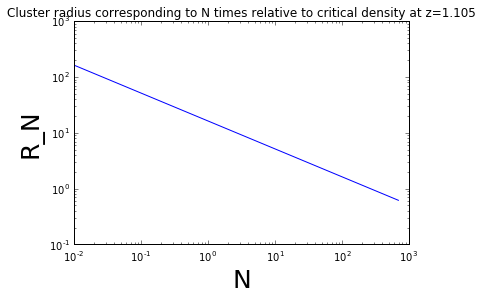

In [7]:
#Plot R_N for each cluster, given a velocity dispersion and redshift, mark R_200 and Rvir
#Using Brian's equations, I think units are Mpc
N=np.arange(0.01,700,5)
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3.)*om + ol) )
#py.plot(np.log10(N), np.log10(R_N))
py.plot(N,R_N)
py.title('Cluster radius corresponding to N times relative to critical density at z=1.105')
py.ylabel('R_N',fontsize=25)
py.xlabel('N',fontsize=25)
pyplot.yscale('log')
pyplot.xscale('log')
#py.show()

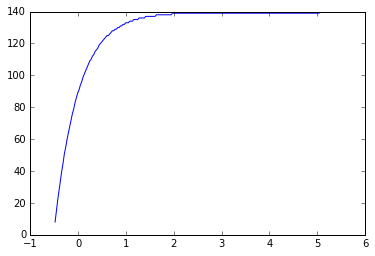

In [9]:
values, base = np.histogram(np.log(R_N), bins=200)
#evaluate the cumulative
cumulative = np.cumsum(values)
# plot the cumulative function
py.plot(base[:-1], cumulative, c='blue')
#By R_N=10Mpc (10^1), most of the mass is enclosed

current M200 values for cluster with  840.4 100
rs r200 cs rhos 3159.94434672 0.361934796502 1.14385993809 3.16040333548 7.62498177554e+14


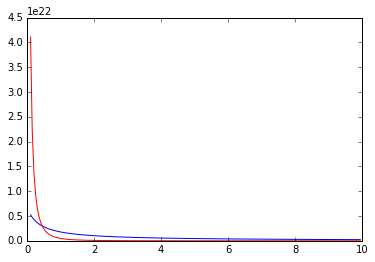

In [10]:
#Try SciPy symbolic integration
#M200_ is in units solar mass, so M200_/10**14 is units 10^14 Msun 
#To put in units of kg, must multiply by kginMsun = 1.98892*10**30 # kg in a solar mass
print 'current M200 values for cluster with ',sigma,err_sig
#from sympy import *
#write/plot potential, to r200, then take derivative
#R_s=
#const=
#Newtons are kg*m/s^2
#Will uses rho with units. He integrates to 
#V_nfw = numpy.sum(-4*numpy.pi*G*rho_s_1*r_s_1**3/(r)*(numpy.log(1+(r)/r_s_1)-(r)/(r_s_1+r_200_1))*m[mask_lt])
cs=2.5
r=Symbol('r')
rs=Symbol('rs')
#rs=1.0
#rho=1/(r/rs)*1/(1+r/rs)**2
#phi1=-1*(rs**3)*(1/r)*(np.log(1+(r/rs)))
#phi2=-1*(rs**3)*(1/r)*(-(r/rs)) #should add plus r200 if that's integral limit
#phi=-1*(rs**3)*(1/r)*(np.log(1+(r/rs)) - (r/rs))
##print diff(-1*(rs**3)*(1/r)*(log(1+(r/rs)) - (r/rs)),r)
#Have to figure out what differential force is relative to
##print diff( diff(-1*(rs**3)*(1/r)*(log(1+(r/rs)) - (r/rs)),r),r )
#to plot, assign values and add np. to natural log
r=arange(0.1,10,.05)
del_c, rs, r200, cs, rhos = profiles.nfwparam_extended(M200_/1e14,z,h_scale=0.7,Om=0.3,Ol=0.70,Or=0.0)
#profiles.nfwparam_extended(M_200,z,h_scale=0.7,Om=0.3,Ol=0.7,Or=0.0) M200/1e14 put in units=e14 M_sun
print 'rs','r200','cs','rhos',del_c, rs, r200, cs, rhos #Mpc, Mpc, conc, rho_s (M_sun/Mpc^3)
#rs=1.0
#When there is no mass this is essentially acceleration
const=4.*np.pi*G*M200*rhos
F=-const*rs**3*(-1./rs + 1/(rs*(r/rs + 1.)))/r + rs**3*(-r/rs + np.log(r/rs + 1.))/r**2
Ft=const*rs/(r*(r/rs + 1.)**2) + 2.*rs**3.*(-1/rs + 1/(rs*(r/rs + 1)))/r**2 - 2.*rs**3*(-r/rs + np.log(r/rs + 1))/r**3
py.plot(r, F,'b-')
py.plot(r, Ft,'r-')
#differential force gets smaller

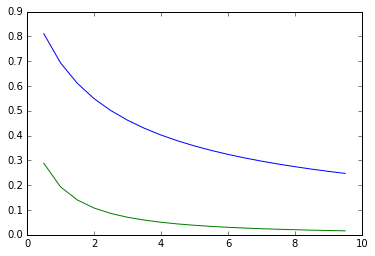

In [11]:
r=arange(0.0,10,.5)
a=1.
#r=arange(0.05,10,.5)
#density is positive and decreasing, potential is negative and decreasing
#Force is positive and decreasing
#py.plot(r, -1*(1/r)*(np.log(1+(r/a))))
#Could just approximate differential force as integral of potential between two radii
py.plot(r, (1/r)*(np.log(1+(r/a)))) #abs value integral NFW density distribution kg/m^3 at r
py.plot(r, -(1/a)/(r*(r/a + 1))+np.log(r/a+1)/r**2) #potential (derivative of rho), to r_200 or r_N truncation


Our M200 3.02549563333e+14


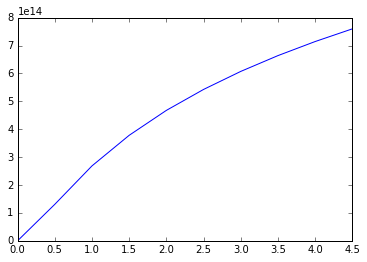

In [12]:
#differential acceleration (tidal force from CM to edge is proportional to 1/d^3, Ft=2*GMmr/d**3)
#Doing this by hand for an NFW halo may be a pain in the butt, so approx
#diff( diff( -(1/r)*(log(1+(r/1))) ,r ) )
#1/(r*(r + 1)**2) + 2/(r**2*(r + 1)) - 2*log(r + 1)/r**3
MW=1.2*10**12
#Enclosed mass inside radius r, for NFW with scale radius rs and characteristic density rho
#http://www.slac.stanford.edu/pubs/slacpubs/15250/slac-pub-15442.pdf The Newtonian Potential of a Dark Matter Halo
#Menc=4*np.pi *rhos*rs**3*( np.log( (rs+r)/rs ) - r/(r+rs) ) #B.1, Behroozi, Loeb, Wechsler
#rhos=1.0
#%pylab inline
r=arange(0.0,5,.5) #note shape is like x^2 at small radii til ~0.5
#at r~0.5Mpc mass is 1e15 or 10 e14 Msun...cluster A is massive?
print 'Our M200',M200_ #2.91546371993e+14
Menc=4.*np.pi *rhos*rs**3.*( np.log( (rs+r)/rs ) - r/(r+rs) )
#so for R_N=4 enclosed mass will be huge 1.2e16...I guess this is why we have truncation radius
py.plot(r,Menc)
#py.plot(r,np.log( (rs+r)/rs ) - r/(r+rs))

R_N for N= 200.0 is 1.15376053907 Mpc M(r<R_N)= 3.04813518215 10**14 Msun
Differential force on galaxy of radius 0.01 Mpc due to cluster NFW halo enclosed mass is
3.35108212107e+52 Newtons
Using constants rs cs rhos 0.361934796502 3.16040333548 7.62498177554e+14
Recall dynamical M200 is: 3.02549563333e+14 for 840.4 km/s
Binding force per unit mass on galaxy 8.55e+43
Binding force per unit mass on galaxy of mass 1.99e+42 1.70e+86
R_N for N= 10 is 5.15977399023 Mpc M(r<R_N)= 8.13430337397 10**14 Msun
Differential force on galaxy of radius 0.01 Mpc due to cluster NFW halo enclosed mass is
5.07768395606e+14 Newtons, Ok not yet Newtons...


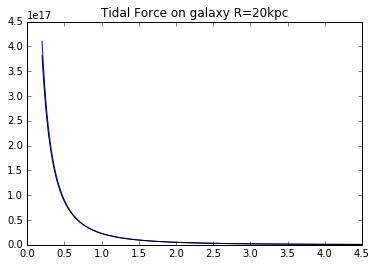

In [14]:
#Look at more approximations and models, including binding energy
py.close()
G = 4.3*10**(-9) #newton's constant in units of Mpc*(km/s)**2 / M_sun
#G = 6.673*10**(-11) #newton's constant in units of N*m**2 / kg**2
#c = 3e5 #speed of light km/s
#sinGyr = 31556926.*10**9 # s in a Giga-year
#kginMsun = 1.98892*10**30 # kg in a solar mass
#kminMpc = 3.08568025*10**19 # km in a Megaparsec
minMpc = 3.08568025*10**22 # m in a Megaparsec            
r2d = 180/numpy.pi # radians to degrees conversion factor
#G = 6.673*10**-11 # m**3/kg/s**2
c = 3*10**5 #Units km/s
#conversions
secinGyr = 31556926*10**9 #seconds in a gigayear
kminMpc = 3.08568025*10**19 # km in a Megaparsec
kginMsun = 1.98892*10**30
#Potential and force outside truncation radius, in radial direction
#Approx as point outside of enclosed mass, or point mass at r=0 with
del_c, rs, r200, cs, rhos = profiles.nfwparam_extended(M200_/1e14,z,h_scale=0.7,Om=0.3,Ol=0.70,Or=0.0)
r=arange(0.2,4.5,.009) #units Mpc? r/rs, R (kpc), Ho is km/s/Mpc
M=1*10**14 #enclosed mass of a cluster in units of solar mass, most do units of 10^14M* 
#Force units are N, kg*m/s^2
m=1e12 #units Msun. Milky way is .8-1.5e12. ellipticals can be e7-e13
phiG=-G*M/r
FG=G*m*M/r**2
FtG=G*m*M/r**3
#Model differential acceleration at 1/r^3 to guage tidal force
#Differential acceleration on satellite, for F on point mass add m, R, r is radius of galaxy
D=1.0
R=10*10**-3 #20kpc, ellipticals range 0.3-100+kpc 
#d_At=G*M*( 1/D**2 - 1/(D+r)**2 )
zC=1.105
N=200.
R_N=np.sqrt(6)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
Menc=4.*np.pi *rhos*rs**3*( np.log( (rs+R_N)/rs ) - R_N/(R_N+rs) )
F_At=G*Menc*m*( 1/R_N**2 - 1/(R_N+R)**2 ) #basically the same as FG.
F_At=F_At*kginMsun*(1e6) #Use this when G is in mpc/msun t oyeld Newtons
print 'R_N for N=',N,'is',R_N,'Mpc M(r<R_N)=', Menc/1e14,'10**14 Msun'
print 'Differential force on galaxy of radius',R,'Mpc','due to cluster NFW halo enclosed mass is'
print F_At,'Newtons'
#Tidal force on galaxy of radius R
Menc=4.*np.pi *rhos*rs**3*( np.log( (rs+r)/rs ) - r/(r+rs) )
F_At=G*Menc*m*( 1/r**2 - 1/(r+R)**2 ) #basically the same as FG.
FtGenc=2*G*m*Menc*R/r**3 #approx tidal force on point due to NFW enclosed mass (not differential)
FtoNewtons = kginMsun / minMpc * (1**3)**2 #km**2 to m**2

#G in Mpc/Msun[km/s]**2, R in Mpc, r in kpc (10**-3 Mpc), M in Msun
#So Menclosed must be in Msun
#r<<R, for da greater than binding acceleration  
py.plot(r,FtGenc)
py.plot(r,F_At,'k-')
#py.plot(r,AG,'b-')
print 'Using constants rs','cs','rhos',rs, cs, rhos #Mpc, Mpc, conc, rho_s (M_sun/Mpc^3)
py.title('Tidal Force on galaxy R=20kpc')
print 'Recall dynamical M200 is:', M200_,'for',sigma,'km/s'
#binding force per unit mass#Note for Will's version of G this will not be in newtons
print 'Binding force per unit mass on galaxy {:.2e}'.format((G*m/R**2.)*kginMsun*(1e6))
print 'Binding force per unit mass on galaxy of mass {:.2e} {:.2e}'.format(1e12*kginMsun,(G*m/R**2)*1e12*kginMsun**2*(1e6))
N=10
R_N=np.sqrt(6.)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
Menc=4.*np.pi *rhos*rs**3*( np.log( (rs+R_N)/rs ) - R_N/(R_N+rs) )
F_At=G*Menc*m*( 1/R_N**2. - 1/(R_N+R)**2. ) #basically the same as FG. Note G is not in correct
print 'R_N for N=',N,'is',R_N,'Mpc M(r<R_N)=', Menc/1e14,'10**14 Msun'
print 'Differential force on galaxy of radius',R,'Mpc','due to cluster NFW halo enclosed mass is'
#I need to fix this
print F_At,'Newtons, Ok not yet Newtons...'


In [15]:
print 'Binding force per unit mass on galaxy {:.2e}'.format((G*m/R**2.))
print 'Binding force per unit mass on galaxy of mass {:.2e} {:.2e}'.format(1e12,(G*m/R**2)*1e12)
N=100
R_N=np.sqrt(6.)*sigma/(np.sqrt(N)*70.*np.sqrt( pow((1.+zC),3)*om + ol) )
Menc=4.*np.pi *rhos*rs**3*( np.log( (rs+R_N)/rs ) - R_N/(R_N+rs) )
F_At=G*Menc*m*( 1/R_N**2. - 1/(R_N+R)**2. ) #basically the same as FG.
print 'R_N for N=',N,'is',R_N,'Mpc M(r<R_N)=', Menc/1e14,'10**14 Msun'
print 'Differential force on galaxy of radius',R,'Mpc','due to cluster NFW halo enclosed mass is'
print F_At,'Newtons'

Binding force per unit mass on galaxy 4.30e+07
Binding force per unit mass on galaxy of mass 1.00e+12 4.30e+19
R_N for N= 100 is 1.63166380208 Mpc M(r<R_N)= 4.03316091795 10**14 Msun
Differential force on galaxy of radius 0.01 Mpc due to cluster NFW halo enclosed mass is
7.91177041114e+15 Newtons


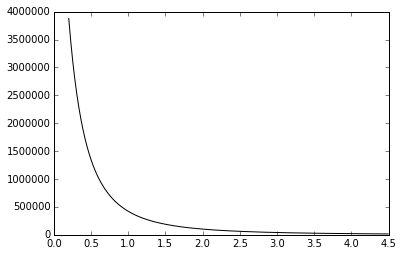

In [527]:
#Radial tidal acceleration (without mass M) in Mpc/s**2
r=arange(0.2,4.5,.009)
R=0.2
Menc=4.*np.pi *rhos*rs**3*( np.log( (rs+r)/rs ) - r/(r+rs) )
At=G*Menc*( 1/r**2. - 1./(r+R)**2. ) #basically the same as FG.
#G in Mpc/Msun[km/s]**2, R in Mpc, r in kpc (10**-3 Mpc), M in Msun
#So Menclosed must be in Msun
#r<<R, for da greater than binding acceleration  
#py.plot(r,FG)
py.plot(r,At,'k-')


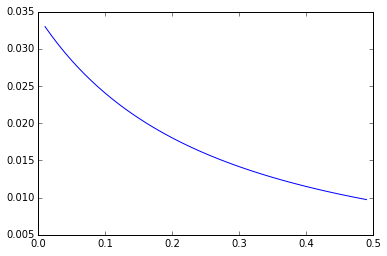

In [496]:
#Using Paper Formula r here is in kpc, so prolly a kpc/s
r=arange(0.01,0.5,.01)
R=20
Menc=4.*np.pi *rhos*rs**3.*( np.log( (rs+r)/rs ) - r/(r+rs) )
M=Menc/1e14
#print M
a_t=1.5*10**(-3.)*M*( 1/r**2. - 1/(r+R)**2. ) 
py.plot(r,a_t)

Critical radius at which cluster force exceeds galaxy binding energy per unit mass


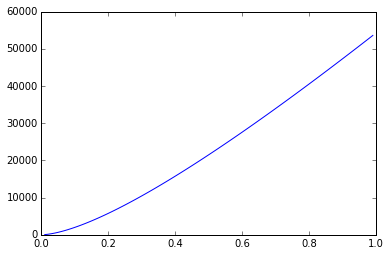

In [519]:
#Roche limit
#A galaxy is said to be in a cluster if it is gravitationally bound to that cluster.
#It feels tidal accelerations from the potential as it falls in, the effects of which depend on
#The radius and density of the galaxy, and the radius, thus enclosed mass, of the cluster
#The common way to approx this is with Fg outside a point mass, which falls off exponentially
#Tidal radius, Binney and Tremaine, including centrifugal force of rotation 
#around cluster center
#COndition is tidal acceleration exceeding the binding energy per unit mass
#of galaxy internally Gm/r**2, material distance r from m will be stripped
#Clearly is a linear function of R, except that Menc grows with R
R=arange(.01,1,.01) #
#r=arange(0.01,0.5,.01)
Menc=4.*np.pi *rhos*rs**3.*( np.log( (rs+R)/rs ) - R/(R+rs) )
#M=Menc/1e14
#M=M200_
#print MW,M #kginMsun doesn't matter cause cancel
#R=r
#r_t_c=R*( (MW/(4.*np.pi *rhos*rs**3.*( np.log( (rs+R)/rs ) - R/(R+rs) ))) / (3.+ MW/(4.*np.pi *rhos*rs**3*( np.log( (rs+R)/rs ) - R/(R+rs) ))) )**(1/3)
#uncorrected
#r_t=R* ( MW / 2.*(4.*np.pi *rhos*rs**3.*( np.log( (rs+R)/rs ) - R/(R+rs) )) )**(1/3.)
r_t=R*( m / 2.*Menc )**(1/3.)
py.plot(R,r_t)
#Note Rochet limit is similar but prop density
#print r_t
#py.plot(R,r_t_c)
#R=r200
#r_t_c=R*( (MW/Menc) / (3.+ MW/Menc) )**(1/3)
#uncorrected
print 'Critical radius at which cluster force exceeds galaxy binding energy per unit mass of galaxy'
#print 'r_t, r_t_c for ',R, r_t, r_t_c
#print r200


In [18]:
#Look into use of binding force (per unit mass):


In [95]:
'''
His units for G and potential energy are in Mpc/M_sun * (km/s)^2 which cancel partially for his calculation of potential energy yielding units of (km/s)**2. To calculate force, there is an extra factor of 1/Mpc to get to Newtown (kg*m/s**2):
G = 4.3*10**(-9) #newton's constant in units of Mpc*(km/s)**2 / M_sun
G = 6.673*10**(-11) #newton's constant in units of N*m**2 / kg**2
where,
kginMsun = 1.98892*10**30 # kg in a solar mass
kminMpc = 3.08568025*10**19 # km in a Megaparsec
minMpc = 3.08568025*10**22 # m in a Megaparsec 
Also, assuming the ratio is correct despite the units:
Mean force on high quality spectral objects in back and front regions:
4.22476323499e+29 4 7.0338897796e+29 
Ratio: 0.600629718032 back/front 
1.66491928384 time greater <tidal force> on merger front than back galaxies

'''
#G = 6.673*10**(-11) #N*m**2 / kg**2 #This is in m, NOTE NOT IN KM but M
G = 4.3*10**(-9) #newton's constant in units of Mpc*(km/s)**2 / M_sun
kminMpc = 3.08568025*10**19 # km in a Megaparsec
kginMsun = 1.98892*10**30 # kg in a solar mass
D=(4.62/2)*kminMpc #Mpc for galaxy halfway between cluster centroid/center of mass to cm of galaxy r
M1,M2=2.92e14*kginMsun,5.47e14*kginMsun
r=10.*1e-03*kminMpc #10kpc in Mpc 1kpc=1e-3 Mpc, MW radius in Mpc
m=1.0e11*kginMsun #MW mass in M_sun
#When differential acceleration > gravitational binding acceleration, stars will be stripped
#Only valid for points directly along the line of center of mass and R<<r. Otherwise within a body tidal bulges form like toothpaste coming out of tube
F_m=2.*G/r**2.
dA1=2.*G*M1*r/D**3.
dA2=2.*G*M2*r/D**3.
dA=dA1+dA2
r_t=D*(m/(2.*M1))**(1/3.) #Also the Jacobi/Roche limit...matter beyond this radius in galaxy mass m gets stripped
r_tt=D*(m / (2.*(M1+M2)))**(1/3.) #Also the Jacobi/Roche limit...matter beyond this radius in galaxy mass m gets stripped
#print 'tidal ratio factor for M1: ',(m/(2.*M1))**(1/3.),'D: ',D
print 'r_t: ',r_t, 'km, r_t/kminMpc',r_t/kminMpc,(r_t/kminMpc)*1000,'Mpc, kpc'
print 'r_t for M2:',D*(m/(2.*M2))**(1/3.)/kminMpc
print 'r_t for M1:',D*(m/(2.*M1))**(1/3.)/kminMpc
print 'total M2+M1 in Mpc:',r_tt/kminMpc,(r_tt/kminMpc)*1000,' kpc, where text galaxy is 10kpc'
print 'ratios of r_t for merger front object over r_t behind M1, M2: ',r_tt/(D*(m/(2.*M2))**(1/3.)),r_tt/(D*(m/(2.*M1))**(1/3.))
print 'ratios of r_t for merger front object under r_t behind M1, M2: ',(D*(m/(2.*M2))**(1/3.))/r_tt,(D*(m/(2.*M1))**(1/3.))/r_tt


#print 'for a tidal radius of 10kpc, total masses must be larger or radius smaller:'
#(0.1*kminMpc) = D*(m / (2.*(M1+M2)))**(1/3.) 

print '\nBinding force per unit mass:',F_m,'FtAB: ', dA
print 'Ratio tidal acceleration/binding force per unit mass with all conversions: ',dA/F_m #e7. Units are the same without multiplying binding F/unit mass by total mass
#This has to be right cause acceleration distance is km/Mpc without conversion rather than km/km


#Trying everything without G (same) and converting to Mpc:
D=(4.62/2) #Mpc for galaxy halfway between cluster centroid/center of mass to cm of galaxy r
M1,M2=2.92e14,5.47e14
r=10.*1e-03 #10kpc in Mpc 1kpc=1e-3 Mpc, MW radius in Mpc
m=1.0e11 #MW mass in M_sun
F_m=2./r**2. #for ratio don't include G
dA1=2.*M1*r/D**3.
dA2=2.*M2*r/D**3.
dA=dA1+dA2
ratio=dA/F_m
'''
print '\nRatio a_t/F_b/m without G and conversions from Msun and Mpc:', dA/F_m
h
print '+ number greater than 1 means tidal force in mfrom both halos added is much greater than binding energy'
print '\nSingle halo ratios: ',dA1/F_m, dA2/F_m,'Subtracted: ',(dA2-dA1)/F_m
print '\nDistance D behind single halo A with halo B 3D away, same direction: '
print 'Ratio a_t/F_b/m without G and conversions from Msun and Mpc:', dA/F_m
print 'Single halo ratios: ',dA1/F_m, dA2/F_m,'Subtracted: ',(dA2-dA1)/F_m
'''
dA1=2.*M1*r/D**3.
dA2=2.*M2*r/(3.*D)**3.
dA=dA1+dA2

print '\nRatio tidal/binding force of galaxy between clusters to galaxy in merger back of A', ratio/(dA/F_m)#,(dA/F_m)/ratio
print 'Merger front galaxy experiences ',ratio/(dA/F_m),' times additive tidal force than merger back'

#Note here swapped m1 and m2
dA1=2.*M2*r/D**3.
dA2=2.*M1*r/(3.*D)**3.
dA=dA1+dA2

print 'For galaxy behind M2, 3xM1, Merger front galaxy experiences ',ratio/(dA/F_m),' times additive tidal force than merger back'


print 'Merger back object tidal force is weaker due to further mass M cluster by: ',1./(3.**(3.)), 'or ',27.,' times' #this is not additive, rather the ratio of the two forces compared
#not sure now make additive tidal radius

#A ratio for this test case along the center of mass is expected to be larger than mean of galaxies along

r_t:  3.95814729531e+18 km, r_t/kminMpc 0.12827470686 128.27470686 Mpc, kpc
r_t for M2: 0.104057376576
r_t for M1: 0.12827470686
total M2+M1 in Mpc: 0.0902293844081 90.2293844081  kpc, where text galaxy is 10kpc
ratios of r_t for merger front object over r_t behind M1, M2:  0.867111850954 0.703407449662
ratios of r_t for merger front object over r_t behind M1, M2:  1.15325375717 1.42165113617

Binding force per unit mass: 9.03226372419e-44 FtAB:  1.22275640305e-05
Ratio tidal acceleration/binding force per unit mass with all conversions:  1.35376516938e+38

Ratio tidal/binding force of galaxy between clusters to galaxy in merger back of A 2.68686988495
Merger front galaxy experiences  2.68686988495  times additive tidal force than merger back
For galaxy behind M2, 3xM1, Merger front galaxy experiences  1.5040833942  times additive tidal force than merger back
Merger back object tidal force is weaker due to further mass M cluster by:  0.037037037037 or  27.0  times


In [4]:
#Oct 31st re-doing the tidal force calculation using Moore 1998 within framework of Treu 2003
#Not sure why the paper says cluster center 100-200kpc. 3.9 correlations with clustercentric radius/density
#R_tidal of galaxy,  sigma_gal= 200 km/s from Peliccia 2016
import numpy as np


In [11]:
#Treu et al 2003
#Tidal stripping (Merritt 1983, 1984) removes mass from the outer regions of a galaxy 
#(typically at radii larger than the luminous component)
#modeling cluster and galaxy halos as isothermal spheres with velocity dispersions sig_c and sig_h     
#(Moore et al. 1996, 1998)

#MF_lmass,MF_lmass=10.6, 10.8
#sig_h_MF,sig_h_MB=200,220 #kpc, galaxy halo from pelliccia 
sig_h_MF,sig_h_MB=220,220 #kpc, galaxy halo from pelliccia use MW for now

sigB, err_sigB=681.2,170.1 #cluster velocity dispersion
sigA, err_sigA = 840.4, 244
print 'A, B cluster rtt multiple of optical light radius rtt~X*r_o',(sigA/220+sigB/220)/2, sig_h_MF

#print 'MB',(sigA/200+sigB/200)/2
sigMF=sigA+sigB #In MF we sum them
sigMB=(sigA+sigB)/2
#RvirA, RvirB=0.82,1.01 #Mpc
#RvirA, RvirB=0.82e3,1.01e3 #kpc
#print 'r_peri=rnow/3, eqn already has /3',(4*RvirA+4*RvirB)/2. #mean, for min tidal use average fo MF
#For MB, use either sigA with 4*RvirA or sigB wth 4*RvirB and average
#rnow=(4*RvirA+4*RvirB)/2. #divide by 3 for rperi
rnow=2311.29872438 #from D/2 in Mpc below cell
#rnow=(4*RvirA+4*RvirB)/2/3. #divide by 3 for rperi

#In MF so sum both vdisp, taking same dist around each cluster
print 'rnow:',rnow, sig_h_MF,sigMF, sigMB
print 'MF Rt,mean',1.67*(rnow/100)*(sig_h_MF/50)*((sigMF/1000)**(-1.))
#print 'MF Rt,mean on inv',1.67*(rnow/100)*(sig_h_MF/50)*((sigMF/1000))
#print 1.67*(2.2e3/1e2)*(220/50)*((893+795)/1000)
#print 1.67*(rnow/1e2)*(220/50)*((893+795)/1000)**(-1.)

#MB behind A or B
#print 1.67*(rnow/100)*(sig_h_MB/50)*(sigA/1000)**(-1.)
#print 1.67*(rnow/100)*(sig_h_MB/50)*(sigB/1000)**(-1.)
#print 'mean MB  w A and B',(1.67*(rnow/100)*(sig_h_MB/50)*(sigA/1000)**(-1.)+1.67*(rnow/100)*(sig_h_MB/50)*(sigB/1000)**(-1.))/2
print 'Mean MB  w A and B',(1.67*(rnow/100)*(sig_h_MB/50)*(sigMB/1000)**(-1.))

print 'error: ',np.sqrt(err_sigB**2 + err_sigA**2)/(sigA + sigB)
#Out[66]: 0.19547784319193978
#Error on velocity dispersion errors added in quad is 0.195% so 101.5 km/s is 19.8
#0.195, 19.5% so 203.0 km/s +/- 39.6

#recalculate tidal radius dependence on alpha by dividing by cos alpha
alpha=70
print '\nalpha, rnow, cos alpha',alpha, rnow,np.cos(alpha/180.*np.pi), rnow/np.cos(alpha/180.*np.pi)
print 'MF Rt,mean',1.67*( (rnow/np.cos(alpha/180.*np.pi)) /100)*(sig_h_MF/50)*((sigMF/1000)**(-1.))
print 'Mean MB  w A and B',(1.67*( (rnow/np.cos(alpha/180.*np.pi)) /100)*(sig_h_MB/50)*(sigMB/1000)**(-1.))




A, B cluster rtt multiple of optical light radius rtt~X*r_o 3.45818181818 220
rnow: 2311.29872438 220 1521.6 760.8
MF Rt,mean 101.468687427
Mean MB  w A and B 202.937374854
error:  0.195477843192

alpha, rnow, cos alpha 70 2311.29872438 0.342020143326 6757.78538043
MF Rt,mean 296.674594777
Mean MB  w A and B 593.349189554


In [6]:
z=1.105
RvirA, RvirB=0.82,1.01 #Mpc
raA,decA= 137.68400, 54.372387 #1mpc
raB,decB= 137.51280, 54.309944 #1mpc
print tools.angdist(raA,decA,raB,decB)*60 ,'arcmin angular distance'
print tools.angdist(raA,decA,raB,decB)*60*60 ,'arcsec angular distance'
print tools.angdist(raA,decA,raB,decB)*60*cosmos.ProjectedLength(z) ,'Mpc'
print cosmos.ProjectedLength(z) ,'arcmin/Mpc'
print 19.2*cosmos.ProjectedLength(z) ,'Mpc'
D=tools.angdist(raA,decA,raB,decB)*60*cosmos.ProjectedLength(z)
print 'D/2',D/2, (D*1e3)/2 #Goes into rnow where vdisp modulates mass 
print 1.5*RvirA, 1.5*RvirB, 4*RvirA, 4*RvirB #average middle radius is 2.77, 2.25 for B, A so D/2 is between this

#recalculate tidal radius dependence on alpha by dividing by cos alpha
alpha=50
print np.cos(50/180.*np.pi)


7.06361424076 arcmin angular distance
423.816854446 arcsec angular distance
4.62259744875 Mpc
0.654423824857 arcmin/Mpc
12.5649374373 Mpc
D/2 2.31129872438 2311.29872438
1.23 1.515 3.28 4.04


In [20]:
#Some stuff as response to referee
D=(4.62/2) #Mpc for galaxy halfway between cluster centroid/center of mass to cm of galaxy r
M1,M2=2.92e14,5.47e14
r=10.*1e-03 #10kpc in Mpc 1kpc=1e-3 Mpc, MW radius in Mpc
m=1.0e11 #MW mass in M_sun

#Byrd & Valtonen 1990 indicated that tidal forces could trigger nuclear gas 
#inflow and starbursts, if the perturbation parameter P=(M_cluster/M_galalxy)/(d_gc/r_gal)^(-3) w
#ent above a critical value of around 0.01-0.1 (the higer value assumes a dark matter halo hosting the spiral galaxy).
#Here d_gc is the distance of the galaxy from the cluster, 
#which we can assume to be around 2Mpc for galaxies in the merger front, 
#r_gal is the radius of the galaxy disk, which we can assume to be 10 kpc. 
#Taking a galaxy of stellar mass 5x10^10 Msun, and the cluster of mass 5x10^14 Msun, 
#we obtain a perturbation parameter of 0.001, indicating that the galaxy should be stable against tidally-induced inflows

#highly subject, anything outside 30kpc would be unstable
#P=(M_cluster/M_galalxy)/(d_gc/r_gal)^(-3)
M_cluster,M_galaxy, d_gc, r_gal = 5e14,5e10, 2.0, 10.
#M_cluster,M_galaxy, d_gc, r_gal = 5e14,5e10, 2.0, 20.
print (M_cluster/M_galaxy)/(d_gc/r_gal)**(-3.0)




80.0
